In [2]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\LAKSHMI
[nltk_data]     RAJEEV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Load your Twitter datasets
# Assuming you have two CSV files named 'twitter_train.csv' and 'twitter_validate.csv'
twitter_train_df = pd.read_csv('twitter_train.csv')
twitter_validate_df = pd.read_csv('twitter_validate.csv')

In [5]:

# Combine training and validation datasets for better training
combined_df = pd.concat([twitter_train_df, twitter_validate_df], ignore_index=True)


In [6]:
# Your data
X_train = combined_df.iloc[:, 3].astype(str).tolist()  # Assuming tweet is in the 4th column (index 3)
y_train = combined_df.iloc[:, 2].tolist()  # Assuming sentiment is in the 3rd column (index 2)


In [7]:
# Tokenization, stemming, and cleaning
tokenizer = RegexpTokenizer(r"\w+")
en_stopwords = set(stopwords.words('english'))
ps = PorterStemmer()

In [8]:
def getCleanedText(text):
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    new_tokens = [token for token in tokens if token not in en_stopwords]
    stemmed_tokens = [ps.stem(token) for token in new_tokens]
    clean_text = " ".join(stemmed_tokens)
    return clean_text

In [9]:

X_clean = [getCleanedText(i) for i in X_train]

In [10]:
# Split the data into training and validation sets
X_train, X_validate, y_train, y_validate = train_test_split(X_clean, y_train, test_size=0.2, random_state=42)


In [11]:
# Use TfidfVectorizer and Multinomial Naive Bayes in a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=None, sublinear_tf=True)),
    ('clf', MultinomialNB(alpha=0.1))
])

In [12]:
# Grid Search for hyperparameter tuning
parameters = {
    'tfidf__max_features': [5000, 10000, None],
    'tfidf__sublinear_tf': [True, False],
    'clf__alpha': [0.01, 0.1, 1.0],
}

In [13]:
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(ngram_range=(1, 2),
                                                        sublinear_tf=True)),
                                       ('clf', MultinomialNB(alpha=0.1))]),
             n_jobs=-1,
             param_grid={'clf__alpha': [0.01, 0.1, 1.0],
                         'tfidf__max_features': [5000, 10000, None],
                         'tfidf__sublinear_tf': [True, False]})

In [14]:
# Best parameters from the grid search
print("Best parameters:", grid_search.best_params_)

Best parameters: {'clf__alpha': 0.01, 'tfidf__max_features': None, 'tfidf__sublinear_tf': False}


In [15]:
# Prediction on validation data
y_pred_validate = grid_search.predict(X_validate)

In [38]:
print("Predictions:", y_pred_validate)


Predictions: ['Irrelevant' 'Negative' 'Irrelevant' ... 'Positive' 'Negative' 'Neutral']


In [16]:
# Accuracy Calculation
accuracy = accuracy_score(y_validate, y_pred_validate)
print(f"Accuracy on Validation Set: {accuracy}")

Accuracy on Validation Set: 0.9232293868921776


In [17]:
# Confusion Matrix
conf_mat = confusion_matrix(y_validate, y_pred_validate)

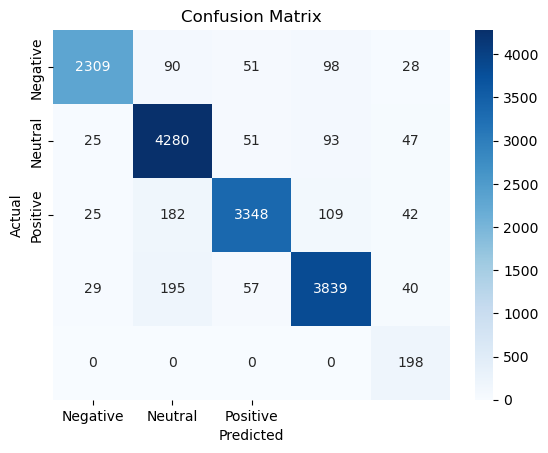

In [18]:
# Plotting the Confusion Matrix
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# Classification Report
from sklearn.metrics import classification_report

class_report = classification_report(y_validate, y_pred_validate)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.97      0.90      0.93      2576
    Negative       0.90      0.95      0.93      4496
     Neutral       0.95      0.90      0.93      3706
    Positive       0.93      0.92      0.93      4160
         nan       0.56      1.00      0.72       198

    accuracy                           0.92     15136
   macro avg       0.86      0.93      0.89     15136
weighted avg       0.93      0.92      0.92     15136



In [22]:
# Pie Chart for Predicted Sentiments
labels = ['Negative', 'Neutral', 'Positive']
sizes = [sum(y_pred_validate == label) for label in labels]
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0, 0)  # explode 1st slice

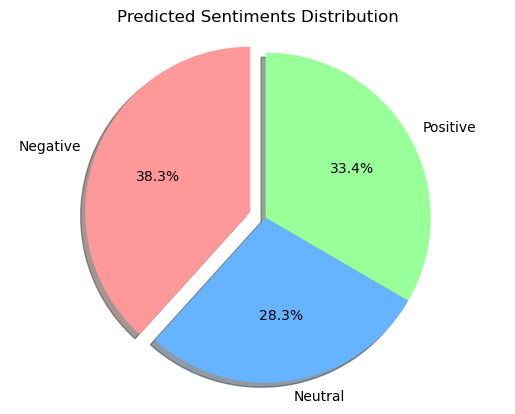

In [23]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Predicted Sentiments Distribution')
plt.show()

In [33]:
# Sort tweets by prediction scores and get the top 10
tweets_with_scores = list(zip(X_validate, y_pred_validate))
sorted_tweets = sorted(tweets_with_scores, key=lambda x: max(grid_search.predict_proba([x[0]])[0]), reverse=True)[:10]


In [27]:
# Print the top 10 tweets
for i, (tweet, sentiment) in enumerate(sorted_tweets, 1):
    print(f"{i}. Sentiment: {sentiment}, Tweet: {tweet}")

1. Sentiment: Neutral, Tweet: hc0rd3r0 thank enter grand summon watch video see 100 amazon gift card retweet everyday anoth chanc win play gs global free 5 golden kamuy unit http co z5w0jt1jsp
2. Sentiment: Neutral, Tweet: edhernandezwin7 thank enter grand summon watch video see 100 amazon gift card retweet everyday anoth chanc win play gs global free 5 golden kamuy unit http co xruogwv5af
3. Sentiment: Neutral, Tweet: thelazygenius12 thank enter grand summon watch video see 100 amazon gift card retweet everi day anoth chanc win play gs global free 5 one punch man unit http co frg8jyhqw
4. Sentiment: Neutral, Tweet: yes43211643 thank enter grand summon watch video see 100 amazon gift card retweet everyday anoth chanc win play free 5 yu yu hakusho unit http co uh9pkxerf3
5. Sentiment: Neutral, Tweet: nyxjacob thank enter grand summon watch video see 100 amazon gift card retweet everi day anoth chanc win play gs global free 5 one punch man unit http fenco wdx2c4vy6u
6. Sentiment: Neutral

In [28]:
from wordcloud import WordCloud
# Create a Word Cloud for the top 10 tweets
top_tweets_text = ' '.join([tweet for tweet, _ in sorted_tweets])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(top_tweets_text)

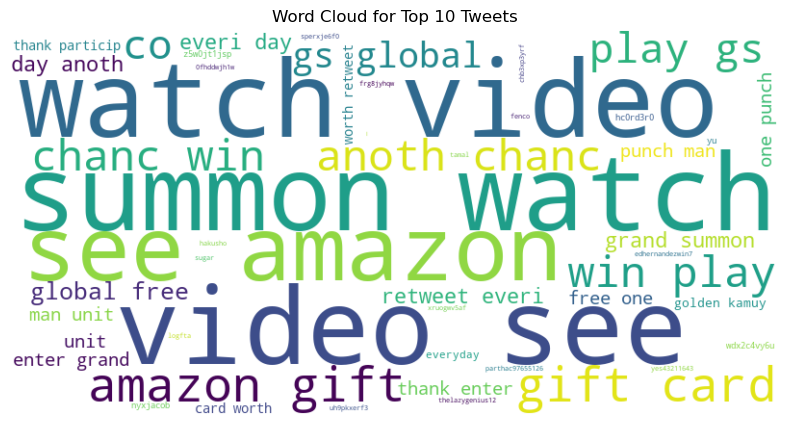

In [29]:
# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top 10 Tweets')
plt.show()